In [46]:
import osmnx as ox

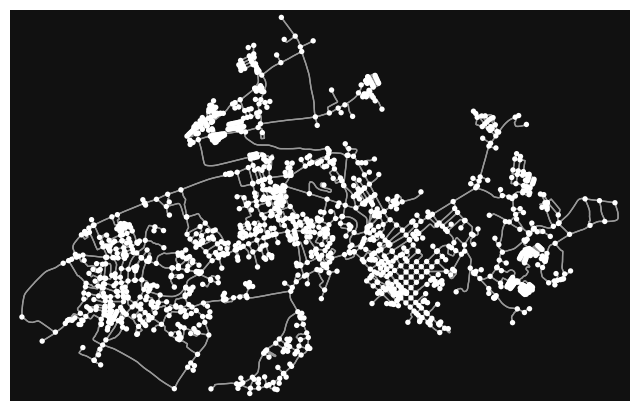

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [47]:
qroad1 = ox.graph_from_place("Marawi city, Lanao del Sur, Philippines")
ox.plot_graph(qroad1)

In [48]:
ox.save_graph_geopackage(qroad1, filepath="qroad1.gpkg")

C:\Users\User\Documents\Anaconda\Lib\site-packages\pyogrio\geopandas.py:275: UserWarning: More than one layer found in 'qroad1.gpkg': 'nodes' (default), 'edges'. Specify layer parameter to avoid this warning.
  result = read_func(


<Axes: >

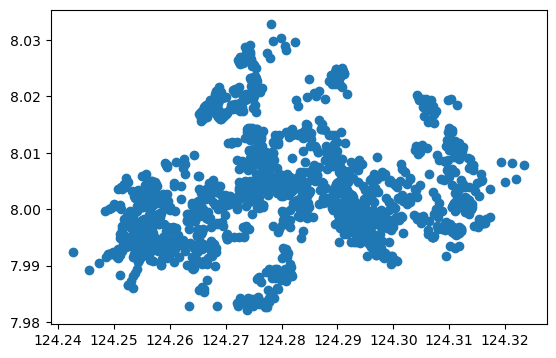

In [49]:
import geopandas as gpd
polygon = gpd.read_file(r"C:\Users\User\OJT UP Diliman\qroad1.gpkg")
polygon.plot()

<Axes: >

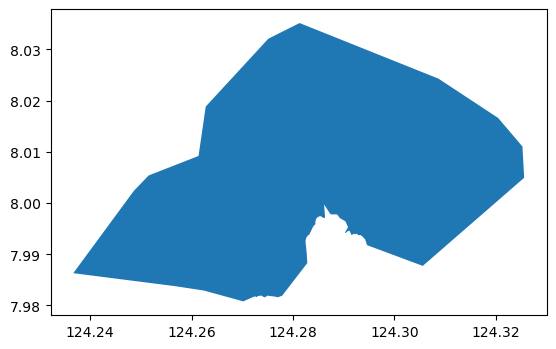

In [50]:
gdf = ox.geocode_to_gdf("Marawi city, Lanao del Sur, Philippines")
gdf.plot() 

<Axes: >

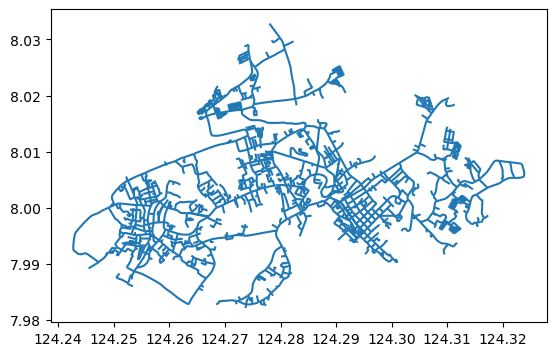

In [51]:
edges = gpd.read_file("qroad1.gpkg", layer='edges')
edges.plot()

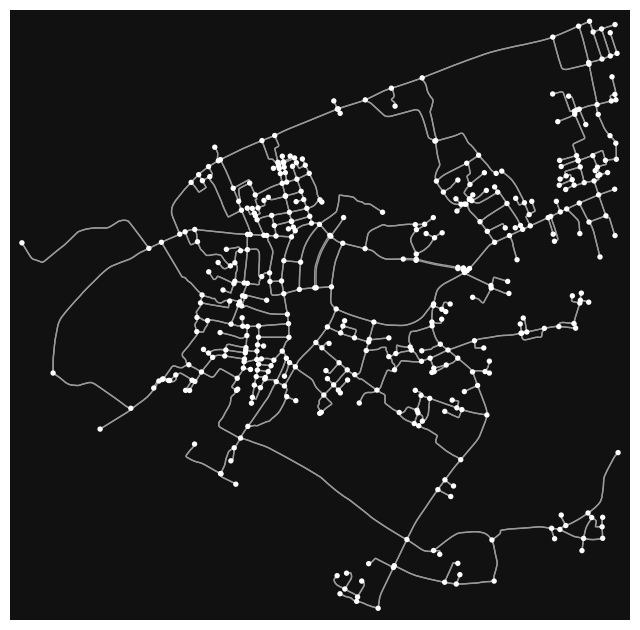

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [52]:
# This is around Marawi City
road2 = ox.graph_from_point((7.995824236782866, 124.25771707918392), dist = 2000, network_type = "drive" )
ox.plot_graph(road2)

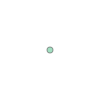

In [53]:
study_area = polygon["geometry"].iloc[0]
study_area

In [54]:
from shapely.geometry import Polygon, MultiPolygon
print(type(study_area))

<class 'shapely.geometry.point.Point'>


In [55]:
gdf = ox.geocode_to_gdf("Marawi city, Lanao del Sur, Philippines")
polygon = gdf.loc[0, 'geometry']

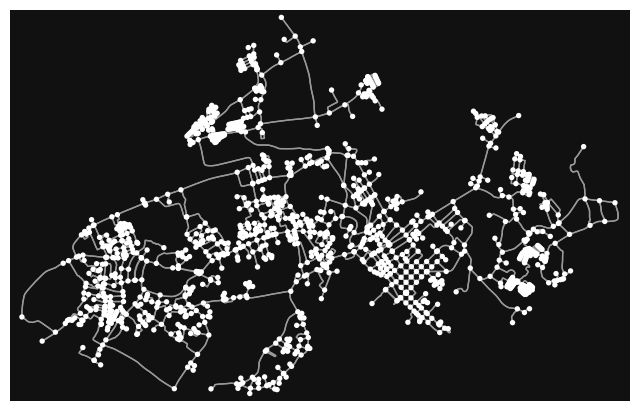

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [56]:
road3 = ox.graph_from_polygon(polygon, network_type="drive")
ox.plot_graph(road3)

In [57]:
place = {"city": "Marawi city", "country": "Philippines"}
G = ox.graph.graph_from_place(place, network_type = "drive", truncate_by_edge = True)
gdf_nodes, gdf_edges = ox.convert.graph_to_gdfs(G)
gdf_nodes.head()

,y,x,street_count,highway,geometry
osmid,,,,,
245363085,8.003983,124.280996,4,NaN,POINT (124.281 8.00398)
1030432166,7.989680,124.281684,3,NaN,POINT (124.28168 7.98968)
1030432280,7.993142,124.280265,3,NaN,POINT (124.28026 7.99314)
1030432527,7.993780,124.265865,4,NaN,POINT (124.26587 7.99378)
1030432641,8.013952,124.284261,3,NaN,POINT (124.28426 8.01395)


In [58]:
G_proj = ox.projection.project_graph(G)
nodes_proj = ox.convert.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.union_all().convex_hull.area
graph_area_m

42471559.98605551

In [59]:
ox.stats.basic_stats(G_proj, area =graph_area_m, clean_int_tol=15)

{'n': 1352,
 'm': 3461,
 'k_avg': 5.1198224852071,
 'edge_length_total': 398111.4920483474,
 'edge_length_avg': 115.0278798174942,
 'streets_per_node_avg': 2.6079881656804735,
 'streets_per_node_counts': {0: 0, 1: 322, 2: 1, 3: 914, 4: 115},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.23816568047337278,
  2: 0.0007396449704142012,
  3: 0.6760355029585798,
  4: 0.08505917159763314},
 'intersection_count': 1030,
 'street_length_total': 201517.3831741843,
 'street_segment_count': 1756,
 'street_length_avg': 114.75932982584527,
 'circuity_avg': 1.0777211371274937,
 'self_loop_proportion': 0.0011389521640091116,
 'clean_intersection_count': 735,
 'node_density_km': 31.833066655519502,
 'intersection_density_km': 24.251522673953467,
 'edge_density_km': 9373.601821526157,
 'street_density_km': 4744.760570140291,
 'clean_intersection_density_km': 17.30569821879204}

In [60]:
G = ox.routing.add_edge_speeds(G)
G = ox.routing.add_edge_travel_times(G)

In [61]:
orig = ox.distance.nearest_nodes(G, X= 124.28064249135879, Y= 8.00326028743235)
dest = ox.distance.nearest_nodes(G, X= 124.28824081303898, Y=8.011305073109723)

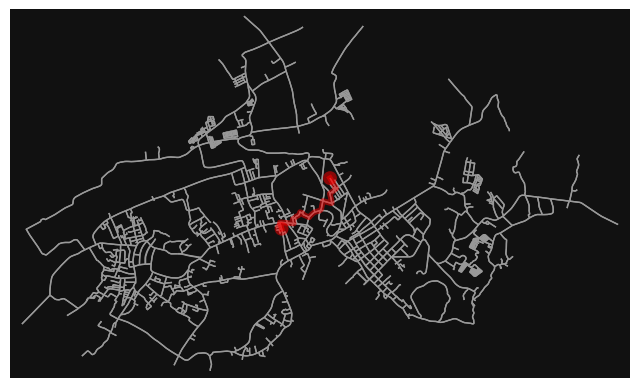

In [62]:
route = ox.routing.shortest_path(G, orig, dest, weight="travel_time")
fig, ax = ox.plot.plot_graph_route(G, route, node_size=0)

In [63]:
edge_lengths = ox.routing.route_to_gdf(G, route)["length"]
round(sum(edge_lengths))

1950

In [64]:
orig_x = G.nodes[orig]["x"]
orig_y = G.nodes[orig]["y"]
dest_x = G.nodes[dest]["x"]
dest_y = G.nodes[dest]["y"]
round(ox.distance.great_circle(orig_y, orig_x, dest_y, dest_x))

1243

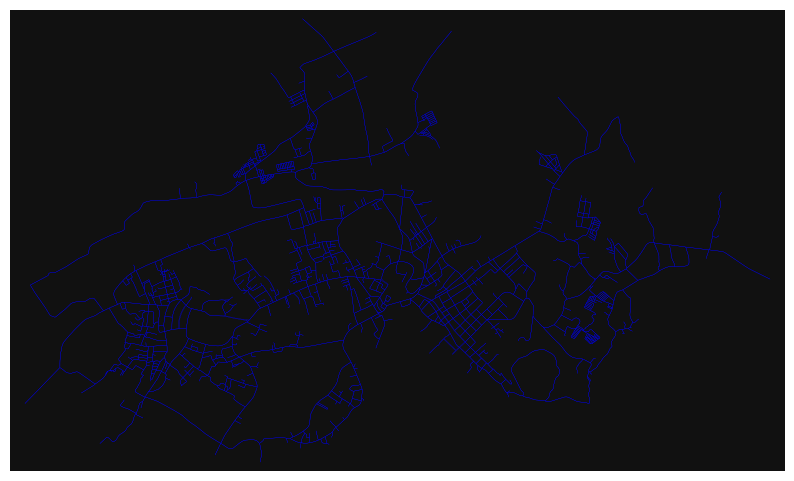

In [65]:
place = {"city": "Marawi city", "country": "Philippines"}
G = ox.graph.graph_from_place(place, network_type = "drive", truncate_by_edge = True)
fig, ax = ox.plot.plot_graph(G, figsize = (10,10), node_size= 0, edge_color= "b", edge_linewidth = 0.2)

In [66]:
place = "Marawi city, Philippines"
tags = {"building": True}
gdf = ox.features.features_from_place(place, tags)
gdf.shape

(17610, 55)

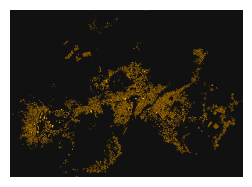

In [67]:
fig, ax = ox.plot.plot_footprints(gdf, figsize=(3, 3))

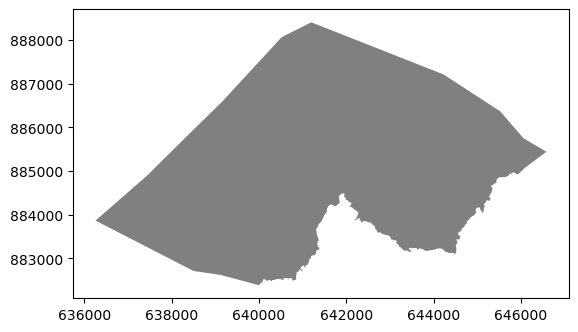

In [68]:
city = ox.geocoder.geocode_to_gdf("Marawi city, Philippines")
city_proj = ox.projection.project_gdf(city)
ax = city_proj.plot(fc="gray", ec="none")
_ = ax.axis()

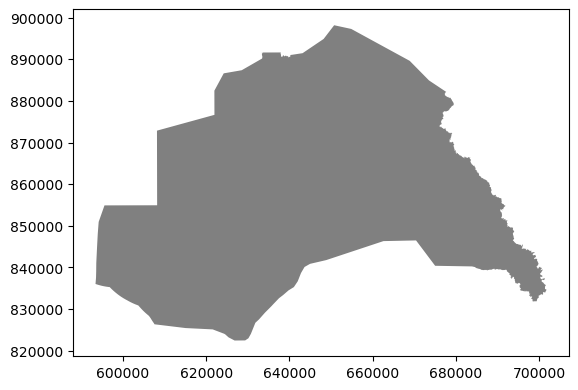

In [69]:
place_names = ["Lanao del Sur, Philippines",
               "Marawi city, Philippines",
              ]
east_bay = ox.geocoder.geocode_to_gdf(place_names)
east_bay = ox.projection.project_gdf(east_bay)
ax = east_bay.plot(fc="gray")
_ = ax.axis()

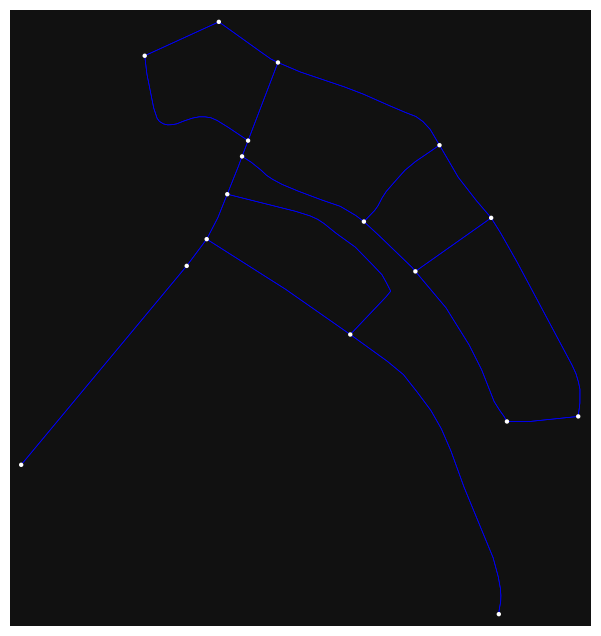

In [70]:
location_point = (7.887367410696001,124.3475285706806)
G = ox.graph.graph_from_point(location_point, dist = 750, dist_type="bbox", network_type="drive")
fig, ax = ox.plot.plot_graph(G, node_size=10, edge_color="b", edge_linewidth=0.5)